In [1]:
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [2]:
originData = pd.read_csv('C:\Project\data\creditcard.csv', index_col='Time')
originData.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


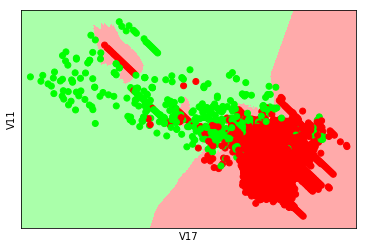

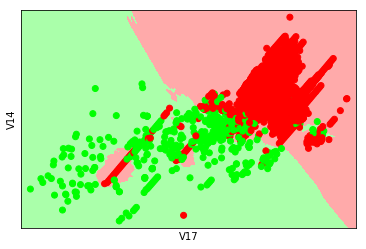

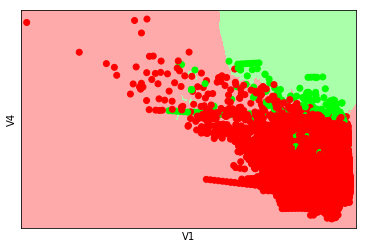

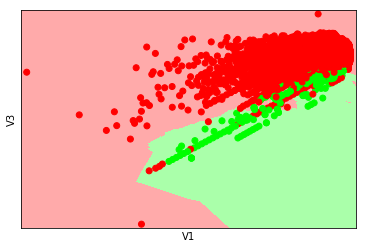

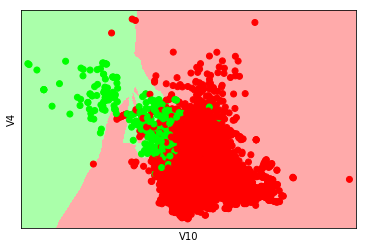

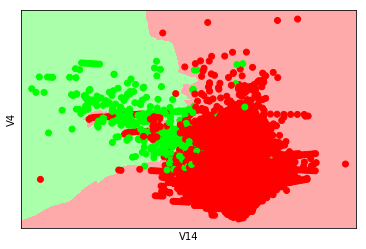

In [3]:
sampleData = originData

n_neighbors = 10
num=0
h = 0.02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000','#00FF00'])


items = [['V17','V11'], ['V17','V14'], ['V1','V4'], ['V1','V3'], ['V10','V4'], ['V14','V4']]

for item in items:
    x = sampleData[item]
    y = sampleData['Class']

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(x,y)

    x_min, x_max = x[item[0]].min()-1,x[item[0]].max()+1
    y_min, y_max = x[item[1]].min()-1,x[item[1]].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min,y_max,h))
    xx, xx.shape, yy, yy.shape

    xr = xx.ravel()
    yr = yy.ravel()

    xy = np.c_[xr,yr]
    z = clf.predict(xy)
    z = z.reshape(xx.shape)

    plt.pcolormesh(xx,yy,z,cmap=cmap_light)
    plt.scatter(x[item[0]],x[item[1]], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(item[0])
    plt.ylabel(item[1])
    plt.show()